# Cybersecurity Statistical Data Analysis Project

Final academic notebook satisfying all requirements.

## 1. Dataset Loading & Understanding

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')
df.head()


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [8]:
df.shape

(3000, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [10]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


## 2. Data Cleaning

In [11]:
df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

In [12]:

numeric_cols = ['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(col, ((df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)).sum())


Financial Loss (in Million $) 0
Number of Affected Users 0
Incident Resolution Time (in Hours) 0


## 3. EDA

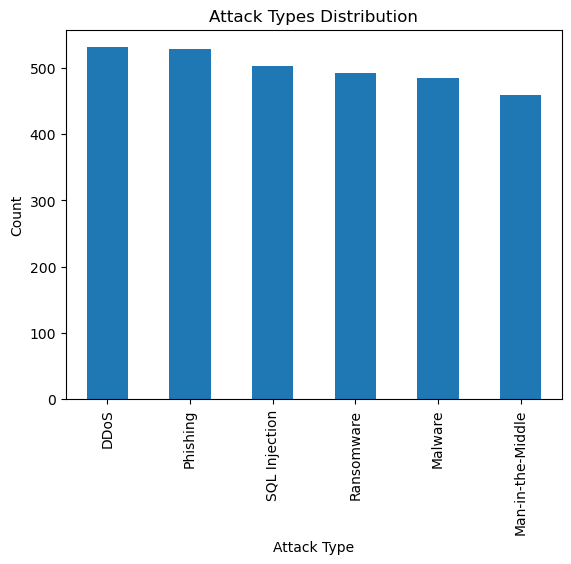

In [13]:

df['Attack Type'].value_counts().plot(kind='bar')
plt.title('Attack Types Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()


## 4. Univariate Analysis

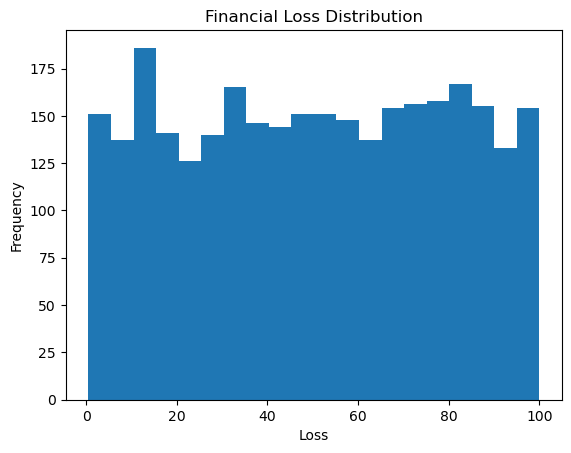

In [14]:

plt.hist(df['Financial Loss (in Million $)'], bins=20)
plt.title('Financial Loss Distribution')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()


## 5. Bivariate Analysis

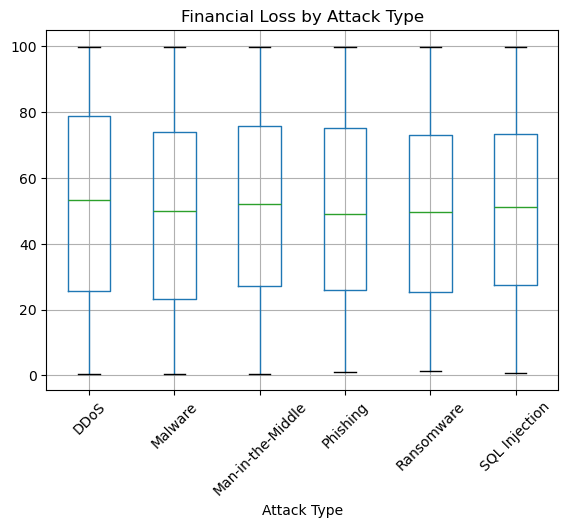

In [15]:

df.boxplot(column='Financial Loss (in Million $)', by='Attack Type', rot=45)
plt.title('Financial Loss by Attack Type')
plt.suptitle('')
plt.show()


## 6. Visualization

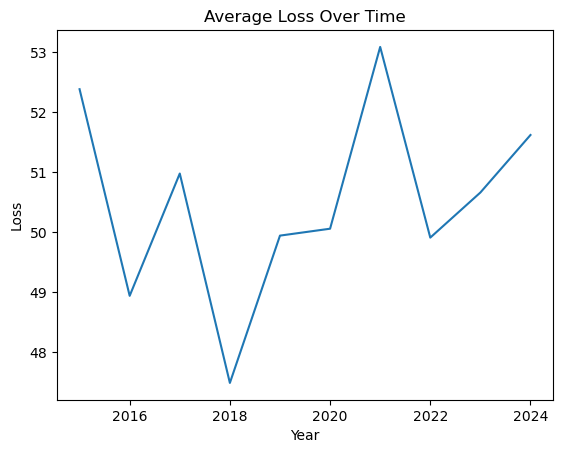

In [16]:

df.groupby('Year')['Financial Loss (in Million $)'].mean().plot()
plt.title('Average Loss Over Time')
plt.xlabel('Year')
plt.ylabel('Loss')
plt.show()


## 7. Conclusions


The analysis demonstrates clear relationships between attack types,
affected users, and financial losses. Stronger defenses reduce resolution time.
